
<img align="left" width="400" height="100" src="https://pandas.pydata.org/pandas-docs/stable/_static/pandas.svg">
<img align="right" width="200" height="100" src="https://upload.wikimedia.org/wikipedia/en/thumb/c/cd/Anaconda_Logo.png/330px-Anaconda_Logo.png">

# Course: <font color='blue'>Statistical Machine Learning</font>
# Author: <font color='blue'>*Syed Muhammad Wali Rizwan*
 

# Task_Analysis
<br>

1. <a href="#1:-Analysing-the-Features-that-have-effect-on-the-price-of-mobile-phone">Analysing the Features that have effect on the price of mobile phone</a>
2. <a href="#2:-Classification-Task">Classification Task</a>
3.  <a href="#3:-Likely-Features-that-affects-the-price-of-mobile-phones">Likely Features that affects the price of mobile phones</a>
4. <a href="#4:-Accuracy-Of-Classifier">Accuracy</a>


In [41]:
# import packages that helps to analysis and working with the given data...
# All these packages are used in analysing the given data so load them early and set up an enviroment for working...
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
%matplotlib inline
warnings.simplefilter('ignore') # give arrgument ignore in simplefilter just to hide the warning messages before 
# visualization of graphs....

## 1: Analysing the Features that have effect on the price of mobile phone

In [42]:
#Load Datasets......
Train_Data_Set = pd.read_csv('train.csv')
Train_Data_Set.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


In [43]:
# Gives basic statistics about data.....
Train_Data_Set.describe() 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [44]:
#Separate Feature columns with Compare(PriceRange) columns
Features = Train_Data_Set.iloc[:,0:20]
PriceRange = Train_Data_Set['price_range']

In [45]:
Features.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [46]:
PriceRange.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [47]:
#Put these in new dataframe
F_corr_PR   = Features.corrwith(PriceRange)
Comparation = pd.DataFrame(F_corr_PR)
Comparation.columns = ['Comparation']
Comparation

,Comparation
battery_power,0.200723
blue,0.020573
clock_speed,-0.006606
dual_sim,0.017444
fc,0.021998
four_g,0.014772
int_memory,0.044435
m_dep,0.000853
mobile_wt,-0.030302
n_cores,0.004399


<AxesSubplot:>

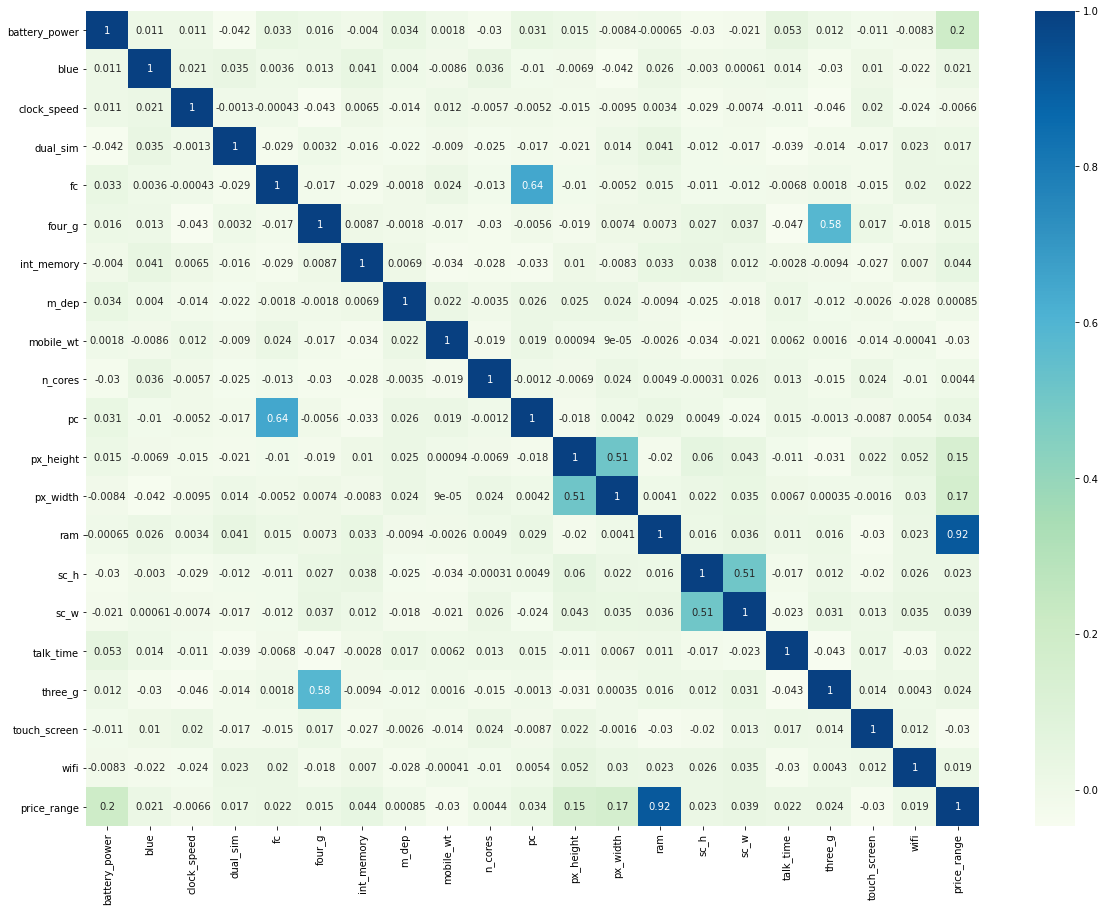

In [48]:
# heatmap shows the relation between columns by chaning their color......
plt.figure(figsize=(20,15))
Comparation = Train_Data_Set.corr() # correlate columns......
sns.heatmap(Comparation, cmap = "GnBu", annot = True)

In [49]:
# Taking value from above data
High_value = pd.DataFrame(F_corr_PR)
High_value.columns = ['High_value']
High_value['High_value'].nlargest() # .nlargest show high values in a list.....
# It shows that these features will effect the price range of phone as customers tends to buy a phone with these features
# from above it shows ram has the max effect in purchasing 

ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
Name: High_value, dtype: float64

In [50]:
Correlated_to = Train_Data_Set[['ram','battery_power', 'px_width', 'px_height']]
Correlated_to

,ram,battery_power,px_width,px_height
0,2549,842,756,20
1,2631,1021,1988,905
2,2603,563,1716,1263
3,2769,615,1786,1216
4,1411,1821,1212,1208
...,...,...,...,...
1995,668,794,1890,1222
1996,2032,1965,1965,915
1997,3057,1911,1632,868
1998,869,1512,670,336


## 2: Classification Task

In [51]:
New_df = pd.DataFrame(PriceRange) #create new data frame and stores price_range column in it...
Price_Range_Trans = np.array(New_df) # then convert this column into array....
# with the help of numpy where function creates a new data frame with our desire values
df = df2 = np.where(Price_Range_Trans<1,Price_Range_Trans,1)
Trans = pd.DataFrame(df)
Trans.columns = ['Price_Range_Trans']
pd.concat([New_df, Trans], axis=1) # join both data sets to show the comparision........

,price_range,Price_Range_Trans
0,1,1
1,2,1
2,2,1
3,2,1
4,1,1
...,...,...
1995,0,0
1996,2,1
1997,3,1
1998,0,0


In [52]:
Price_Range_Trans = pd.DataFrame(df2) #separate the classified column into new dataset
Price_Range_Trans.columns = ['Price_Range_Trans']
Price_Range_Trans

,Price_Range_Trans
0,1
1,1
2,1
3,1
4,1
...,...
1995,0
1996,1
1997,1
1998,0


## 3: Likely Features that affects the price of mobile phones

In [53]:
# for test train split uses correlated columns with classified price_range
X = Correlated_to
Y = Price_Range_Trans

In [54]:
# take 20% for testing and 80% for training
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [55]:
print(X_train.shape)
print(Y_train.shape)

(1600, 4)
(1600, 1)


In [56]:
print(X_test.shape)
print(Y_test.shape)

(400, 4)
(400, 1)


In [57]:
# fit logistic regression model....
from sklearn.linear_model import LogisticRegression
logistic_Regression_Model = LogisticRegression()
logistic_Regression_Model.fit(X_train,Y_train)

LogisticRegression()

In [58]:
# predicted the values
print(logistic_Regression_Model.predict(X_test))

[1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0
 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1
 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0
 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0]


In [59]:
Y_pred=logistic_Regression_Model.predict(X_test)

In [60]:
# confusion metric is used to describe the performance of classifier.......
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
Confusion_Matrix = metrics.confusion_matrix(Y_test, Y_pred)
Confusion_Matrix

array([[ 91,   4],
       [  2, 303]], dtype=int64)

In [61]:
# accuracy score of predicted data set....
accuracy_Train_Model = metrics.accuracy_score(Y_test, Y_pred)
accuracy_Train_Model

0.985

In [62]:
Accuracy_Train = (accuracy_Train_Model)*100 
print("Accuracy {:0.1f}%:".format(Accuracy_Train))

Accuracy 98.5%:


## 4: Accuracy Of Classifier

In [63]:
# load test data
Test_Data = pd.read_csv('test.csv')
Test_Data.head(2)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0


In [64]:
# id column as no purpose so drop that column from dataset
Test_Data=Test_Data.drop('id',axis=1)

In [65]:
#select same features from test data which are highly correlated in train data set....
Test_Features = Test_Data[['ram', 'battery_power', 'px_width', 'px_height']]

In [66]:
# fit model
Predicted_Price_Range_Test = logistic_Regression_Model.predict(Test_Features)

In [67]:
# We are able to forecast test dataset labels:
Predicted_Price_Range_Test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [68]:
# join price range column in test data set in order to predict the accuracy of our predicted values 
Test_Data['price_range'] = Predicted_Price_Range_Test

In [69]:
Test_Data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,1
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,1
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,1
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


In [70]:
Features_TestData = Test_Features
PriceRange_TestData = Test_Data['price_range']

In [71]:
x = Features_TestData
y = PriceRange_TestData

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [73]:
print(x_train.shape)
print(y_train.shape)

(800, 4)
(800,)


In [74]:
print(X_test.shape)
print(Y_test.shape)

(400, 4)
(400, 1)


In [75]:
from sklearn.linear_model import LogisticRegression
logistic_Regression_Model_Test = LogisticRegression()
logistic_Regression_Model_Test.fit(x_train,y_train)

LogisticRegression()

In [76]:
print(logistic_Regression_Model_Test.predict(x_test))

[1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0
 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0]


In [77]:
y_pred=logistic_Regression_Model_Test.predict(x_test)

In [78]:
# confusion metric is used to describe the performance of classifier.......
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 51,   1],
       [  0, 148]], dtype=int64)

In [79]:
accuracy_Test_Model = metrics.accuracy_score(y_test, y_pred)
accuracy_Test_Model

0.995

In [80]:
# we achieve accuracy for our predicted values....
Accuracy_Test = (accuracy_Test_Model)*100 
print("Accuracy {:0.1f}%:".format(Accuracy_Test))

Accuracy 99.5%:
